In [23]:
from sklearn import datasets
import pandas as pd
digit = datasets.load_digits()
type(digit)
digit.keys()
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data = pd.DataFrame(digit['data'])
labels = pd.Series(digit['target'])

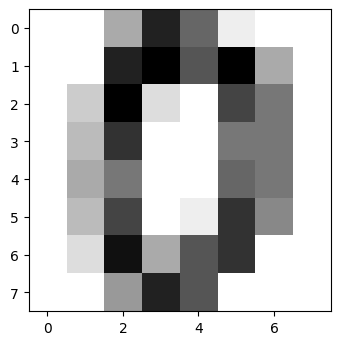

In [25]:
first_image = data.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

numpy.int64

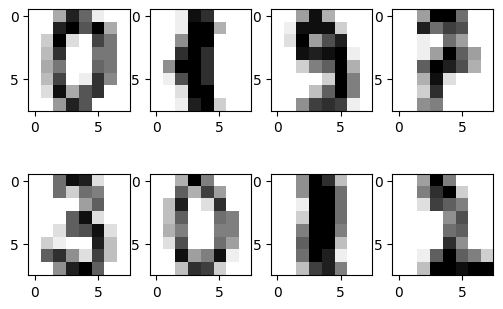

In [43]:
f, axarr = plt.subplots(2, 4)

axarr[0, 0].imshow(data.iloc[0].values.reshape(8,8), cmap='gray_r')
axarr[0, 1].imshow(data.iloc[99].values.reshape(8,8), cmap='gray_r')
axarr[0, 2].imshow(data.iloc[199].values.reshape(8,8), cmap='gray_r')
axarr[0, 3].imshow(data.iloc[299].values.reshape(8,8), cmap='gray_r')

axarr[1, 0].imshow(data.iloc[999].values.reshape(8,8), cmap='gray_r')
axarr[1, 1].imshow(data.iloc[1099].values.reshape(8,8), cmap='gray_r')
axarr[1, 2].imshow(data.iloc[1199].values.reshape(8,8), cmap='gray_r')
axarr[1, 3].imshow(data.iloc[1299].values.reshape(8,8), cmap='gray_r')


In [51]:
from sklearn.model_selection import train_test_split, cross_val_score
data_train, data_test, label_train, label_test = train_test_split(data, labels, test_size = .2, random_state = 36)
from sklearn.neighbors import KNeighborsClassifier
def train(k):
    knc = KNeighborsClassifier(n_neighbors = k)
    knc.fit(data_train,label_train)
    return knc
def test(knc):
    return cross_val_score(knc, data_test, label_test, cv = 4)
    

for k in [4,8,12]:
    knc = train(k)
    score = test(knc)
    print(score)

[0.95555556 0.94444444 0.94444444 0.97777778]
[0.92222222 0.93333333 0.87777778 0.96666667]
[0.94444444 0.92222222 0.86666667 0.92222222]


In [1]:
from sklearn.neural_network import MLPClassifier
for n in [8,16,32,64,128,256]:
    mlp = MLPClassifier(hidden_layer_sizes=(n,))
    mlp.fit(data_train,label_train)
    print(cross_val_score(mlp, data_test, label_test, cv = 4))

NameError: name 'data_train' is not defined

In [53]:
from sklearn.neural_network import MLPClassifier
for n in [64]:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n))
    mlp.fit(data_train,label_train)
    print(cross_val_score(mlp, data_test, label_test, cv = 4))

[0.94444444 0.87777778 0.87777778 0.94444444]


In [54]:
from sklearn.neural_network import MLPClassifier
for n in [10,64,128]:
    mlp = MLPClassifier(hidden_layer_sizes=(n,n,n))
    mlp.fit(data_train,label_train)
    print(cross_val_score(mlp, data_test, label_test, cv = 4))

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/dataquest/system/env/python3/lib/python3.8/site-packages/sklearn/neural

[0.84444444 0.78888889 0.71111111 0.91111111]
[0.94444444 0.88888889 0.9        0.96666667]
[0.95555556 0.92222222 0.9        0.98888889]
